<div style='text-align: right; font-weight: bold;'> March 31, 2016 </div>

<div style='text-align: right;'>Nitin Narayan | n.narayan@student.tue.nl | student no.0976544 </div>

<div style='text-align: right;'>Rodrigo Mendoza | r.a.mendoza.marin@student.tue.nl  | student no.0980103</div>

<div style="text-align: right;">Both members of the group contributed equally</div>

<h1 align="center" style="color: #0066cc">3 Kernel methods</h1> 

In [96]:
# Global imports and settings
from sklearn.metrics import roc_curve, auc
import numpy as np
from scipy.spatial import ConvexHull
from openml.apiconnector import APIConnector
import pandas as pd
from sklearn.grid_search import GridSearchCV
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets.samples_generator import make_blobs
import math
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
from openml.apiconnector import APIConnector
import os
from matplotlib.colors import Normalize
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.svm import SVC
from pylab import imshow, show, get_cmap

# Matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["figure.max_open_warning"] = -1

# Print options
import numpy as np
np.set_printoptions(precision=4)

# Slideshow
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {'width': 1440, 'height': 768, 'scroll': True, 'theme': 'simple'})

# Silence warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)

<h2 style="color: #0066cc"> 3.1 Exercise 1: Kernel selection </h2>


Generate a 2-dimensional dataset with 1000 examples. Use, for instance, mlbench.threenorm in R or
make blobs in Python. Study the effect of the choice of kernel by visualizing the results.

In [97]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2,
                      random_state=0)

Train an SVM on the dataset using respectively a linear, polynomial and radial basis function (RBF)
kernel, evaluate the performance of each kernel using 10-fold cross-validation and AUC (area under
the ROC curve), and visualize the results. Which kernels work best? Can you intuitively explain these
results?

In [98]:
svc = svm.SVC(kernel='linear').fit(X, y)
rbf_svc = svm.SVC(kernel='rbf').fit(X, y)
poly_svc = svm.SVC(kernel='poly').fit(X, y)

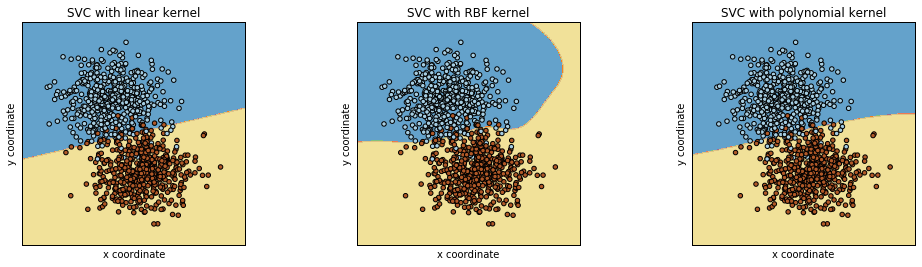

In [99]:
h = .02 
plt.rcParams["figure.figsize"] = (16, 4)
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial kernel']


for i, clf in enumerate((svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(1, 3, i + 1)
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('x coordinate')
    plt.ylabel('y coordinate')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

For the RBF kernel, vary the C and the gamma parameters and evaluate using 10-fold CV and
AUC. Use at least 4 values for C and 
, varying one while you keep the other at default, i.e. 8 results.
Also explore a few extreme values, i.e. very low and very high values for C and gamma 
. Which settings
work well? Visualize a well-scoring and a poor-scoring setting and interpret them. Explain as good as
possible what happens to your predictions if you do this.

In [100]:
clf1 = svm.SVC(kernel='rbf',C=math.pow(2,-15)).fit(X, y)
clf2 = svm.SVC(kernel='rbf',C=math.pow(2,-5)).fit(X, y)
clf3 = svm.SVC(kernel='rbf',C=math.pow(2,5)).fit(X, y)
clf4 = svm.SVC(kernel='rbf',C=math.pow(2,15)).fit(X, y)
clf5 = svm.SVC(kernel='rbf',gamma=math.pow(2,-15)).fit(X, y)
clf6 = svm.SVC(kernel='rbf',gamma=math.pow(2,-5)).fit(X, y)
clf7 = svm.SVC(kernel='rbf',gamma=math.pow(2,5)).fit(X, y)
clf8 = svm.SVC(kernel='rbf',gamma=math.pow(2,15)).fit(X, y)

In [101]:
print "Varying C, keeping gamma constant. "
scores = cross_val_score(clf1, X, y, 
                         cv=KFold(n=len(X), n_folds=5, random_state=42), 
                         scoring="roc_auc")
print("Accuracy for C=2^-15 : %f +-%f" % (np.mean(scores), np.std(scores)))
scores = cross_val_score(clf2, X, y, 
                         cv=KFold(n=len(X), n_folds=5, random_state=42), 
                         scoring="roc_auc")
print("Accuracy for C=2^-5 : %f +-%f" % (np.mean(scores), np.std(scores)))
scores = cross_val_score(clf3, X, y, 
                         cv=KFold(n=len(X), n_folds=5, random_state=42), 
                         scoring="roc_auc")
print("Accuracy for C=2^5 : %f +-%f" % (np.mean(scores), np.std(scores)))
scores = cross_val_score(clf4, X, y, 
                         cv=KFold(n=len(X), n_folds=5, random_state=42), 
                         scoring="roc_auc")
print "Varying gamma, keeping C constant. "
print("Accuracy for C=2^15 : %f +-%f" % (np.mean(scores), np.std(scores)))
scores = cross_val_score(clf5, X, y, 
                         cv=KFold(n=len(X), n_folds=5, random_state=42), 
                         scoring="roc_auc")
print("Accuracy for gamma=2^-15 : %f +-%f" % (np.mean(scores), np.std(scores)))
scores = cross_val_score(clf6, X, y, 
                         cv=KFold(n=len(X), n_folds=5, random_state=42), 
                         scoring="roc_auc")
print("Accuracy for gamma=2^-5 : %f +-%f" % (np.mean(scores), np.std(scores)))
scores = cross_val_score(clf7, X, y, 
                         cv=KFold(n=len(X), n_folds=5, random_state=42), 
                         scoring="roc_auc")
print("Accuracy for gamma=2^5 : %f +-%f" % (np.mean(scores), np.std(scores)))
scores = cross_val_score(clf8, X, y, 
                         cv=KFold(n=len(X), n_folds=5, random_state=42), 
                         scoring="roc_auc")
print("Accuracy for gamma=2^15 : %f +-%f" % (np.mean(scores), np.std(scores)))

Varying C, keeping gamma constant. 
Accuracy for C=2^-15 : 0.987711 +-0.005352
Accuracy for C=2^-5 : 0.989962 +-0.004718
Accuracy for C=2^5 : 0.985860 +-0.007357
Varying gamma, keeping C constant. 
Accuracy for C=2^15 : 0.989251 +-0.002061
Accuracy for gamma=2^-15 : 0.993375 +-0.002263
Accuracy for gamma=2^-5 : 0.993134 +-0.002374
Accuracy for gamma=2^5 : 0.981712 +-0.005912
Accuracy for gamma=2^15 : 0.557854 +-0.013484


In [102]:
clf11 = svm.SVC(kernel='rbf',C=math.pow(2,-15),gamma=math.pow(2,-15)).fit(X, y)
clf22 = svm.SVC(kernel='rbf',C=math.pow(2,-15),gamma=math.pow(2,15)).fit(X, y)
clf33 = svm.SVC(kernel='rbf',C=math.pow(2,15),gamma=math.pow(2,-15)).fit(X, y)
clf44 = svm.SVC(kernel='rbf',C=math.pow(2,15),gamma=math.pow(2,15)).fit(X, y)

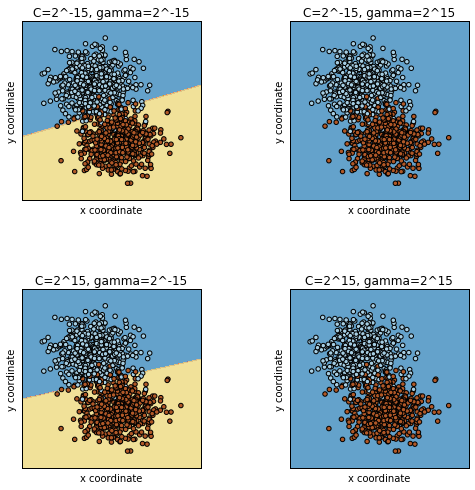

In [45]:
plt.rcParams["figure.figsize"] = (8, 8)
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['C=2^-15, gamma=2^-15',
          'C=2^-15, gamma=2^15',
          'C=2^15, gamma=2^-15',
          'C=2^15, gamma=2^15']


for i, clf in enumerate((clf11, clf22, clf33, clf44)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('x coordinate')
    plt.ylabel('y coordinate')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

<h2 style="color: #0066cc"> 3.2 Exercise 2: Landscape analysis </h2>


Study how SVM hyperparameters interact on the Ionosphere dataset. Running this experiment can take a
while, so start early and use a feasible grid search.

In [51]:
apikey = 'fbc6d4b7868ce52640f6ec74cf076f48'
connector = APIConnector(apikey=apikey)
#loading data
dataset = connector.download_dataset(59)
X, y, attribute_names = dataset.get_dataset(target=dataset.default_target_attribute, return_attribute_names=True)

Do a simple grid search to optimize the gamma
 parameter of the RBF kernel in an SVM, using a 10-fold
cross-validation and AUC. Use a log scale and keep C at its default value. Plot the results (
 vs. AUC
performance).

Best scores:
0.986831482651
Best value for gamma:
{'gamma': 0.5}


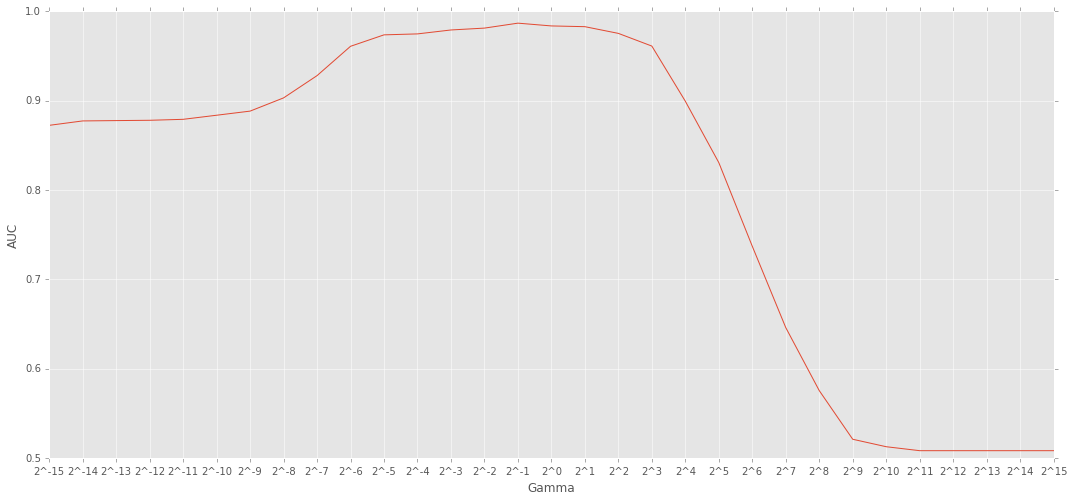

In [63]:
plt.rcParams["figure.figsize"] = (18, 8)

clf = svm.SVC(kernel='rbf')
gammapar = []
for i in range(-15, 16, 1):
    gammapar.append(math.pow(2,i));
param_dist = dict(gamma=gammapar)

rand = GridSearchCV(clf, param_dist, cv=10, scoring="roc_auc")

rand.fit(X,y)
rand_mean_scores =[result.mean_validation_score for result in rand.grid_scores_]
print "Best scores:"
print rand.best_score_
print "Best value for gamma:"
print rand.best_params_

plt.style.use('ggplot')

x_labels = [i for i in range(31)]
gammapar1 = []
for i in range(-15, 16, 1):
    temp = "2^"+str(i)
    gammapar1.append(temp);
plt.plot(x_labels, rand_mean_scores)
plt.xticks(x_labels, gammapar1 )
plt.xlabel('Gamma')
plt.ylabel('AUC')
plt.show()

Again, train an SVM with the RBF kernel, but now vary both the C and 
 at the same time, on
a log scale. Explore how fine-grained this grid/random search can be, given your
computational resources.

Visualize the results in a plot Cxgamma -> p with p being performance of the model (AUC) visualized
as the color of the data point. If you don't know how to do this, at least plot C -> p  for various values
of gamma.

In [68]:
# Utility function to move the midpoint of a colormap to be around the values of interest.

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

In [92]:
C_range = np.logspace(-15, 15, 31, base=2)
gamma_range = np.logspace(-15, 15, 31, base=2)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(y, n_iter=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

scores = [x[1] for x in grid.grid_scores_]
scores = np.array(scores).reshape(len(C_range), len(gamma_range))


The best parameters are {'C': 1.0, 'gamma': 0.25} with a score of 0.96


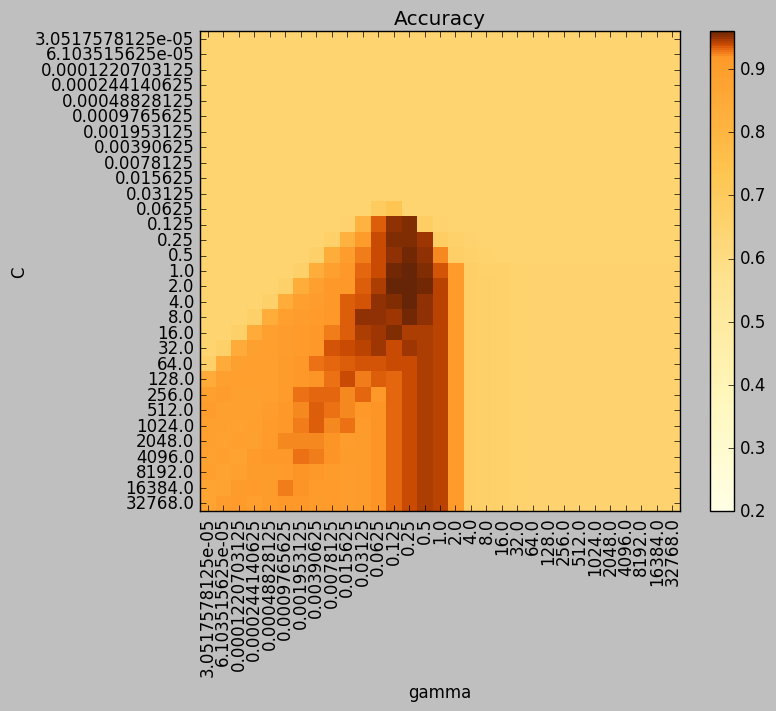

In [91]:
plt.rcParams["figure.figsize"] = (20, 8)
plt.style.use('classic')
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=get_cmap("YlOrBr"),
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=90)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Accuracy')
plt.show()